In [38]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import sys
from os import path
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)



In [39]:
img_path = "./mrut.jpg"
if not path.isfile(img_path):
    print('wrong path for image\n quitting')
    sys.exit()
else:
    try:
        image = cv2.imread(img_path)
    except BaseException as e:
        print('exception {} with image {}\n quitting'.format(e, img_path))
        sys.exit()
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

image = imutils.resize(image, width=2500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

for (i, rect) in enumerate(rects):

    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    clone = image.copy()
    
    (i, j) = face_utils.FACIAL_LANDMARKS_IDXS['nose']
    clone = clone.copy()

    for (x, y) in shape[i:j]:
        cv2.circle(clone, (x, y), 20, (0, 0, 255), -1)

    (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = image[y:y + h, x:x + w]
    roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)


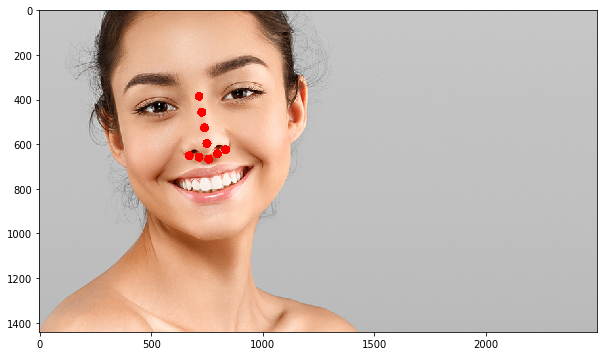

In [40]:

plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))
plt.show()